In [1]:
from util import *
import pysd.restartfile

In [19]:
x1 = np.array([1, 0, 0])
x2 = np.array([-1/2, 3**(1/2)/2, 0])
size = 50

def get_1q_lattice(xlen, ylen, qx, constx=0):
    lattice = []
    for y in range(ylen):
        lattice.append([])
        for x in range(xlen):
            xcoord, ycoord, zcoord = y*x2+x*x1
            factor = np.sqrt(1 - constx**2)
            mag = np.sqrt(np.sum(np.array([np.cos(xcoord*qx)*factor + constx, np.sin(xcoord*qx)*factor, 0])**2))
            lattice[y].append(np.array([np.cos(xcoord*qx)*factor + constx, np.sin(xcoord*qx)*factor, 0])/mag)
    return lattice

def get_fm_lattice(xlen, ylen):
    lattice = []
    for y in range(ylen):
        lattice.append([])
        for x in range(xlen):
            lattice[y].append(np.array([0, 0, 1]))
    return lattice

In [58]:
l_1q = get_1q_lattice(size, size, np.pi/6, 0)


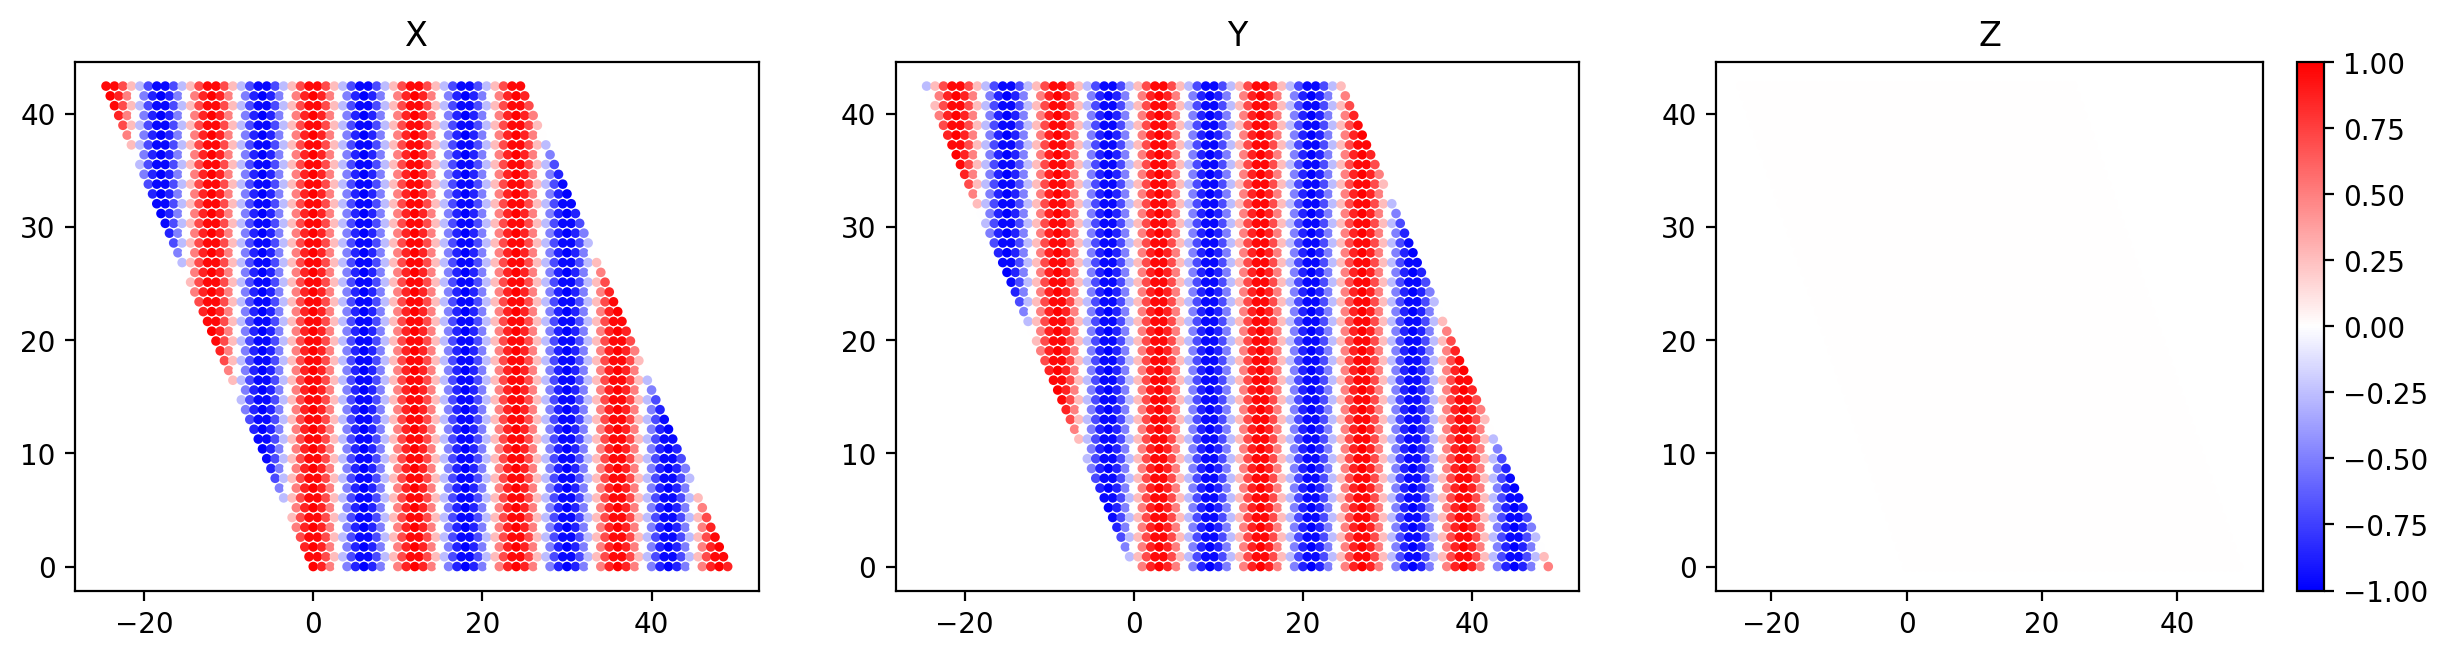

In [59]:
plot_mag(l_1q)

In [22]:
l_fm = get_fm_lattice(size, size)


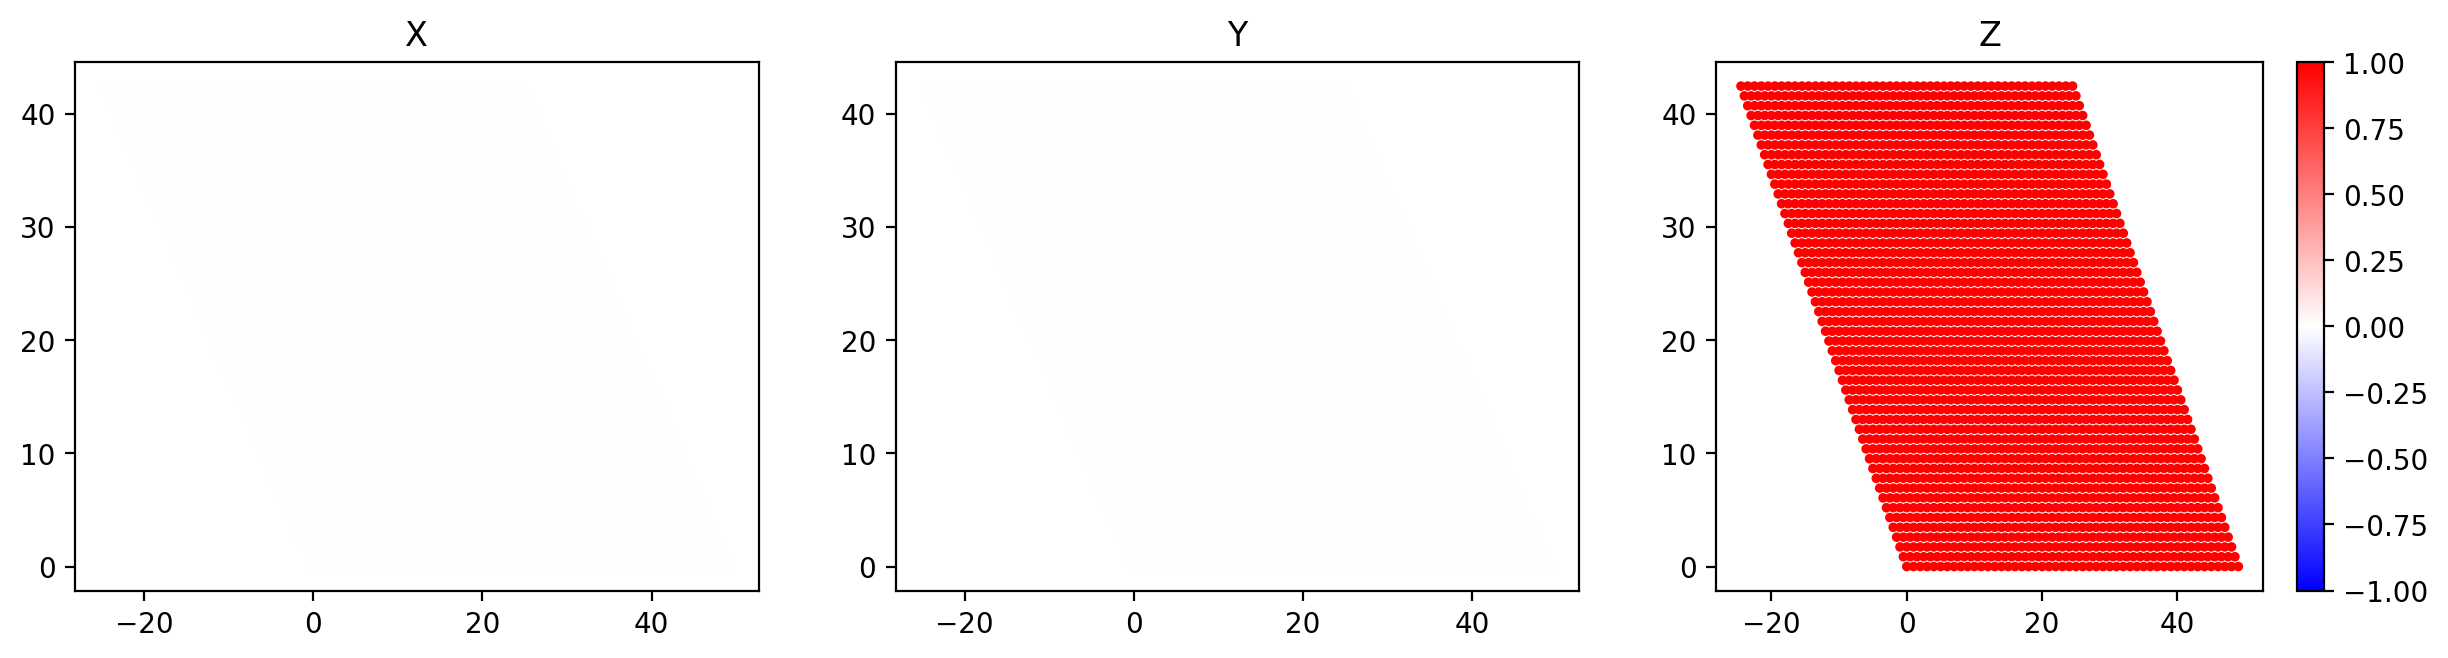

In [23]:
plot_mag(l_fm)

In [24]:
# ham = {"B": np.array([0.2,0,0]), "J1": -1, "DM": 0}
ham = {"B": np.array([0,0,0]), "J1": -1, "DM": 0.5}

In [25]:
print("Energy 1q", get_energy(l_1q, ham))
print("Energy FM", get_energy(l_fm, ham))


J interactions per atom 6.0
energy: H 0.0, J -5.270091011323148, DM -0.005527376907426219
Energy 1q -5.275618388230574
J interactions per atom 6.0
energy: H 0.0, J -6.0, DM 0.0
Energy FM -6.0


In [27]:
for q in np.linspace(0, 2, 20):
  l = get_1q_lattice(size, size, q, 0)
  print("q", q, "energy", get_energy(l, ham))
  

J interactions per atom 6.0
energy: H 0.0, J -6.0, DM 0.0
q 0.0 energy -6.0
J interactions per atom 6.0
energy: H 0.0, J -5.790862158418054, DM 0.003944594409536772
q 0.10526315789473684 energy -5.786917564008518
J interactions per atom 6.0
energy: H 0.0, J -5.771089658302964, DM -0.0028570222334854296
q 0.21052631578947367 energy -5.77394668053645
J interactions per atom 6.0
energy: H 0.0, J -5.6146451488800295, DM -0.002853331536983162
q 0.3157894736842105 energy -5.617498480417012
J interactions per atom 6.0
energy: H 0.0, J -5.523817360680893, DM -0.0035380253028244367
q 0.42105263157894735 energy -5.527355385983718
J interactions per atom 6.0
energy: H 0.0, J -5.561722297247843, DM -0.017278821425818422
q 0.5263157894736842 energy -5.579001118673661
J interactions per atom 6.0
energy: H 0.0, J -5.26940909309663, DM -0.0056438611488620035
q 0.631578947368421 energy -5.275052954245492
J interactions per atom 6.0
energy: H 0.0, J -5.151945600323562, DM -0.0521690849373546
q 0.7368421

In [ ]:
# ham = {"B": np.array([0.5,0,0]), "J1": -1, "DM": 0.2}

for q in np.linspace(0, np.pi, 30):
  l = get_1q_lattice(size, size, q, 0)
  print("q", q, "energy", get_energy(l, size, ham))
  

In [ ]:
lattice = get_1q_lattice(30, 5, np.pi/10, 0)
print(lattice[1][1]**2)

In [ ]:
restartfile = pysd.restartfile.Restartfile()
mag = []
for mom in lattice:
  mag.append([1, mom[1][0], mom[1][1], mom[1][2]])
restartfile.mag = [mag]

In [ ]:
restartfile.save_to_file("pysd_repr/initial_restartfile.in")